## Imports

In [1]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
import sklearn 
from nltk.tokenize import word_tokenize
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

## About Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/data_for_colab/all_data.csv', lineterminator='\n')
df.head()

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺


In [4]:
df

,id,dialect,text
0,1175358310087892992,IQ,@Nw8ieJUwaCAAreT لكن بالنهاية .. ينتفض .. يغير .
1,1175416117793349632,IQ,@7zNqXP0yrODdRjK يعني هذا محسوب على البشر .. ح...
2,1175450108898565888,IQ,@KanaanRema مبين من كلامه خليجي
3,1175471073770573824,IQ,@HAIDER76128900 يسلملي مرورك وروحك الحلوه💐
4,1175496913145217024,IQ,@hmo2406 وين هل الغيبه اخ محمد 🌸🌺
...,...,...,...
458192,1019484980282580992,BH,@Al_mhbaa_7 مبسوطين منك اللي باسطانا😅
458193,1021083283709407232,BH,@Zzainabali @P_ameerah والله ماينده ابش يختي
458194,1017477537889431552,BH,@Al_mhbaa_7 شو عملنا لك حنا تهربي مننا احنا مس...
458195,1022430374696239232,BH,@haneenalmwla الله يبارك فيها وبالعافيه 😋😋😋


In [5]:
df=df.take(np.random.permutation(len(df))[:])

In [6]:
df=df.reset_index(drop=True)

In [7]:
df[df.isnull().any(axis=1)].head()

,id,dialect,text


In [8]:
np.sum(df.isnull().any(axis=1))

0

In [9]:
df.nunique()

id         458197
dialect        18
text       458197
dtype: int64

In [10]:
df.isnull().any(axis=0)

id         False
dialect    False
text       False
dtype: bool

In [11]:
df.shape

(458197, 3)

In [12]:
df.isna().sum()

id         0
dialect    0
text       0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458197 entries, 0 to 458196
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       458197 non-null  int64 
 1   dialect  458197 non-null  object
 2   text     458197 non-null  object
dtypes: int64(1), object(2)
memory usage: 10.5+ MB


### normalize text

In [14]:

COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'
HAMZA = u'\u0621'
ALEF_MADDA = u'\u0622'
ALEF_HAMZA_ABOVE = u'\u0623'
WAW_HAMZA = u'\u0624'
ALEF_HAMZA_BELOW = u'\u0625'
YEH_HAMZA = u'\u0626'
ALEF = u'\u0627'
BEH = u'\u0628'
TEH_MARBUTA = u'\u0629'
TEH = u'\u062a'
THEH = u'\u062b'
JEEM = u'\u062c'
HAH = u'\u062d'
KHAH = u'\u062e'
DAL = u'\u062f'
THAL = u'\u0630'
REH = u'\u0631'
ZAIN = u'\u0632'
SEEN = u'\u0633'
SHEEN = u'\u0634'
SAD = u'\u0635'
DAD = u'\u0636'
TAH = u'\u0637'
ZAH = u'\u0638'
AIN = u'\u0639'
GHAIN = u'\u063a'
TATWEEL = u'\u0640'
FEH = u'\u0641'
QAF = u'\u0642'
KAF = u'\u0643'
LAM = u'\u0644'
MEEM = u'\u0645'
NOON = u'\u0646'
HEH = u'\u0647'
WAW = u'\u0648'
ALEF_MAKSURA = u'\u0649'
YEH = u'\u064a'
MADDA_ABOVE = u'\u0653'
HAMZA_ABOVE = u'\u0654'
HAMZA_BELOW = u'\u0655'
ZERO = u'\u0660'
ONE = u'\u0661'
TWO = u'\u0662'
THREE = u'\u0663'
FOUR = u'\u0664'
FIVE = u'\u0665'
SIX = u'\u0666'
SEVEN = u'\u0667'
EIGHT = u'\u0668'
NINE = u'\u0669'
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
MINI_ALEF = u'\u0670'
ALEF_WASLA = u'\u0671'
FULL_STOP = u'\u06d4'
BYTE_ORDER_MARK = u'\ufeff'

# Diacritics
FATHATAN = u'\u064b'
DAMMATAN = u'\u064c'
KASRATAN = u'\u064d'
FATHA = u'\u064e'
DAMMA = u'\u064f'
KASRA = u'\u0650'
SHADDA = u'\u0651'
SUKUN = u'\u0652'

#Ligatures
LAM_ALEF = u'\ufefb'
LAM_ALEF_HAMZA_ABOVE = u'\ufef7'
LAM_ALEF_HAMZA_BELOW = u'\ufef9'
LAM_ALEF_MADDA_ABOVE = u'\ufef5'
SIMPLE_LAM_ALEF = u'\u0644\u0627'
SIMPLE_LAM_ALEF_HAMZA_ABOVE = u'\u0644\u0623'
SIMPLE_LAM_ALEF_HAMZA_BELOW = u'\u0644\u0625'
SIMPLE_LAM_ALEF_MADDA_ABOVE = u'\u0644\u0622'


HARAKAT_PAT = re.compile(u"["+u"".join([FATHATAN, DAMMATAN, KASRATAN,
                                        FATHA, DAMMA, KASRA, SUKUN,
                                        SHADDA])+u"]")
HAMZAT_PAT = re.compile(u"["+u"".join([WAW_HAMZA, YEH_HAMZA])+u"]")
ALEFAT_PAT = re.compile(u"["+u"".join([ALEF_MADDA, ALEF_HAMZA_ABOVE,
                                       ALEF_HAMZA_BELOW, HAMZA_ABOVE,
                                       HAMZA_BELOW])+u"]")
LAMALEFAT_PAT = re.compile(u"["+u"".join([LAM_ALEF,
                                          LAM_ALEF_HAMZA_ABOVE,
                                          LAM_ALEF_HAMZA_BELOW,
LAM_ALEF_MADDA_ABOVE])+u"]")


""" https://github.com/cltk/cltk/blob/master/cltk/corpus/arabic/alphabet.py """
WESTERN_ARABIC_NUMERALS = ['0','1','2','3','4','5','6','7','8','9']

#EASTERN_ARABIC_NUMERALS = [u'\u06F0', u'\u06F1', u'\u06F2', u'\u06F3', u'\u0664', u'\u06F5', u'\u0666', u'\u06F7', u'\u06F8', u'\u06F9']
EASTERN_ARABIC_NUMERALS = [u'۰', u'۱', u'۲', u'۳', u'٤', u'۵', u'٦', u'۷', u'۸', u'۹']

eastern_to_western_numerals = {}
for i in range(len(EASTERN_ARABIC_NUMERALS)):
    eastern_to_western_numerals[EASTERN_ARABIC_NUMERALS[i]] = WESTERN_ARABIC_NUMERALS[i]

# Punctuation marks
COMMA = u'\u060C'
SEMICOLON = u'\u061B'
QUESTION = u'\u061F'

# Other symbols
PERCENT = u'\u066a'
DECIMAL = u'\u066b'
THOUSANDS = u'\u066c'
STAR = u'\u066d'
FULL_STOP = u'\u06d4'
MULITIPLICATION_SIGN = u'\u00D7'
DIVISION_SIGN = u'\u00F7'

arabic_punctuations = COMMA + SEMICOLON + QUESTION + PERCENT + DECIMAL + THOUSANDS + STAR + FULL_STOP + MULITIPLICATION_SIGN + DIVISION_SIGN
all_punctuations = string.punctuation + arabic_punctuations + '()[]{}'

all_punctuations = ''.join(list(set(all_punctuations)))


In [15]:
def strip_tashkeel(text):
    text = HARAKAT_PAT.sub('', text)
    text = re.sub(u"[\u064E]", "", text,  flags=re.UNICODE) # fattha
    text = re.sub(u"[\u0671]", "", text,  flags=re.UNICODE) # waSla
    return text 

def strip_tatweel(text):
    return re.sub(u'[%s]' % TATWEEL, '', text)


def remove_non_arabic(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u0652 ]", " ", text,  flags=re.UNICODE).split())


def keep_arabic_english_n_symbols(text):
    return ' '.join(re.sub(u"[^\u0621-\u063A\u0640-\u064aa-zA-Z#@_:/ ]", "", text,  flags=re.UNICODE).split())


def normalize_hamza(text):
    text = ALEFAT_PAT.sub(ALEF, text)
    return HAMZAT_PAT.sub(HAMZA, text)


def normalize_spellerrors(text):
    text = re.sub(u'[%s]' % TEH_MARBUTA, HEH, text)
    return re.sub(u'[%s]' % ALEF_MAKSURA, YEH, text)


def normalize_lamalef(text):
    return LAMALEFAT_PAT.sub(u'%s%s'%(LAM, ALEF), text)


def normalize_arabic_text(text):
    text = remove_non_arabic(text)
    text = strip_tashkeel(text)
    text = strip_tatweel(text)
    text = normalize_lamalef(text)
    text = normalize_hamza(text)
    text = normalize_spellerrors(text)
    return text


def remove_underscore(text):
    return ' '.join(text.split('_'))


def remove_retweet_tag(text):
    return re.compile('\#').sub('', re.compile('rt @[a-zA-Z0-9_]+:|@[a-zA-Z0-9_]+').sub('', text).strip())


def replace_emails(text):
    emails = re.findall(r'[\w\.-]+@[\w\.-]+', text)
    for email in emails:
        text = text.replace(email,'#')
        #text = text.replace(email,' hasEmailAddress ')
    return text

def replace_urls(text):
    return re.sub(r"http\S+|www.\S+", "#", text)
    #return re.sub(r"http\S+|www.\S+", " hasURL ", text)

def convert_eastern_to_western_numerals(text):
    for num in EASTERN_ARABIC_NUMERALS:
        text = text.replace(num, eastern_to_western_numerals[num])
    return text

def remove_all_punctuations(text):
    for punctuation in all_punctuations:
        text = text.replace(punctuation, ' ')
    return text

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def replace_phone_numbers(text):
    return re.sub(r'\d{10}', '#', text)
    # return re.sub(r'\d{10}', ' hasPhoneNumber ', text)

def remove_extra_spaces(text):
    return ' '.join(text.split())

def normalize_tweet(text):
    new_text = text.lower()
    #new_text = normalize_hamza(new_text)
    new_text = strip_tashkeel(new_text)
    new_text = strip_tatweel(new_text)
    new_text = normalize_lamalef(new_text)
    #new_text = normalize_spellerrors(new_text)
    new_text = remove_retweet_tag(new_text)
    new_text = replace_emails(new_text)
    new_text = remove_underscore(new_text)
    new_text = replace_phone_numbers(new_text)
    new_text = remove_all_punctuations(new_text)
    new_text = replace_urls(new_text)
    new_text = convert_eastern_to_western_numerals(new_text)
    #new_text = keep_arabic_english_n_symbols(new_text)
    new_text = remove_non_arabic(new_text)
    new_text = remove_extra_spaces(new_text)
    
    return new_text


In [16]:
df['text'] = df['text'].apply(normalize_tweet)
df

,id,dialect,text
0,970413249421340800,QA,اللي طلع من العزبه برافووو
1,958085263149948800,SA,مضيع شكلك رح لهلك الله يسلمك
2,1097228556764102784,PL,هههههه اه متل لمعة بيكون
3,988460926708961152,PL,الله يغير هالحال يا رب
4,1157009062963421184,LB,اي بتوقع وكتير كمان
...,...,...,...
458192,1162011261124665088,MA,ربي يخليك اختي علينا وعليك
458193,1056555444351721600,JO,هم ماقفلوا هالمدرسه الفاشله بعدهم ماالومهم مهي...
458194,940149432846307200,SA,احلى شي نسوي عليهم مثلوثه
458195,937691681880793216,LB,اي يلا انتظر شوي بس يبدلوا ملابسهم ويلبسوا جوا...







# Word Frequencies


In [17]:
tweets = df.text.str.cat(sep=' ')
tweets

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
#function to split text into word
tokens = word_tokenize(tweets)

vocabulary = set(tokens)
print(len(vocabulary))

frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

In [21]:
import pickle

# saving
with open('/content/drive/MyDrive/data_for_colab/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokens, handle, protocol=pickle.HIGHEST_PROTOCOL)


# Unigrams by Counts

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
def top_n_words(corpus, n=None):

    cv = CountVectorizer(stop_words= stopwords.words("arabic")).fit(corpus) 
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 25)
for word, count in common_words:
    
    print(word, count)
df_unigrams = pd.DataFrame(common_words,columns = ['word' , 'count'])
df_unigrams.head(30)


اللي 59777
الله 49766
مش 31211
انا 30472
والله 24798
شي 19813
انت 16867
ان 16348
عشان 13426
الناس 13361
يعني 13312
الي 12138
علي 12071
مو 11939
اذا 11396
او 11330
ده 10674
اي 10324
يوم 10013
شو 9769
انه 9584
ليش 8460
وين 8452
الا 8167
لازم 8043


,word,count
0,اللي,59777
1,الله,49766
2,مش,31211
3,انا,30472
4,والله,24798
5,شي,19813
6,انت,16867
7,ان,16348
8,عشان,13426
9,الناس,13361


In [ ]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_unigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 20 unigrams in text')

# Bigrams By counts


In [ ]:
def top_n_words(corpus, n=None):
    cv = CountVectorizer(stop_words= stopwords.words("arabic"),ngram_range=(2, 2)).fit(corpus)
    bag_of_words = cv.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'], 20)
#for word, count in common_words:
    
    #print(word, count)
df_bigrams = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_bigrams.head(10)

,word,count
0,شاء الله,5607
1,ان شاء,3405
2,الله يبارك,1593
3,حسبي الله,1318
4,الناس اللي,1280
5,مش عارف,1259
6,زد رصيدك,1152
7,يبارك فيك,1096
8,الحمد لله,1058
9,اهم شي,956


In [ ]:
import cufflinks as cf
#configure_plotly_browser_state()
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
df_bigrams.groupby('word').sum()['count'].sort_values(ascending=False).iplot(color = 'darkorange',theme='solar', mode='markers+lines',
    kind='bar', yTitle='Count', linecolor='white', title='top 100 bigrams in text')

# Trigrams By Counts


In [ ]:
def top_n_words(corpus, n=None):
    vect = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vect.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = top_n_words(df['text'],20)
#for word, count in common_words:
    
    #print(word, count)
df_trigram = pd.DataFrame(common_words, columns = ['word' , 'count'])
df_trigram.head(20)
#df_trigram.to_excel('df_trigram.xlsx')

,word,count
0,ان شاء الله,3333
1,ما شاء الله,971
2,الله ونعم الوكيل,903
3,الله يبارك فيك,853
4,إن شاء الله,652
5,حسبي الله ونعم,580
6,وان شاء الله,400
7,من كثر ما,300
8,قوة الا بالله,225
9,كل عام وانت,221


In [ ]:
df_trigram.groupby('word').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', yTitle='Count', linecolor='black', title='Top 20 bigrams in text')

# Stop Words

In [ ]:
# stop = stopwords.words('arabic')
# #words = set(nltk.corpus.words.words())
# arab_stopwords = set(nltk.corpus.stopwords.words("arabic"))
# arab_stopwords

In [ ]:
# arab_stopwords = r'\b(?:{})\b'.format('|'.join(arab_stopwords))
# arab_stopwords

In [ ]:
# df['text']=df['text'].str.replace(arab_stopwords, '')
# df['text'].tail(10)

## **remove repeating char**

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
df["text"] = df['text'].apply(lambda x: remove_repeating_char(x)) # apply used to call the method processpost

# Tokenize Word and Sentence


In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
sentences = df.iloc[30]
sentences['text']
print (nltk.sent_tokenize(sentences['text']))
print('*********************************')
print (nltk.word_tokenize(sentences['text']))

['التفائل فيه كبير اولا لانه ارجنتيني ومعروفين بسرعة انسجامهم وخصوصا عندنا وثاني شي موصي فيه ميليتو يعني اكيد جاف انه يستهل يكون خليفته فالانتر']
*********************************
['التفائل', 'فيه', 'كبير', 'اولا', 'لانه', 'ارجنتيني', 'ومعروفين', 'بسرعة', 'انسجامهم', 'وخصوصا', 'عندنا', 'وثاني', 'شي', 'موصي', 'فيه', 'ميليتو', 'يعني', 'اكيد', 'جاف', 'انه', 'يستهل', 'يكون', 'خليفته', 'فالانتر']


## remove repeating char

In [ ]:
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [ ]:
df["text"] = df['text'].apply(lambda x: remove_repeating_char(x)) # apply used to call the method processpost

# Stemmer

In [ ]:
# pip install nltk

In [ ]:
# import nltk.stem as stemmer

In [ ]:
# pip install tashaphyne

     |████████████████████████████████| 251 kB 5.2 MB/s 
     |████████████████████████████████| 126 kB 33.2 MB/s 


In [ ]:
# #Tashaphyne is an Arabic light stemmer and segmentor. 
# from tashaphyne.stemming import ArabicLightStemmer
# ArListem = ArabicLightStemmer()

#  # stemming word
# stem = ArListem.light_stem(sentences['text'])
#  # extract stem
# print (ArListem.get_stem())
# print('\n')
#  # extract root
# print (ArListem.get_root())
# print('\n')
# print (ArListem.get_prefix())
# print('\n')
# print (ArListem.get_suffix())

نتبرع بفلوس و نشتري من البضاعه الي ما تضرت اكل و شراب و اثاث و لباس الي موجود


نتبرع بفلس  نشتر من لبضعه ل م تضرت كل  شرب  ثث  لبس ل مجد


نت





In [ ]:
df

,id,dialect,text
0,148684060628238336,QA,"يا رب أشفي الشيخ عبدالرحمن السميط وطول بعمره:""..."
1,1082017983252320384,SA,@XandY_87 نشهر فيها!!!\nليه شايفتني ناشر مقاطع...
2,549594850220195840,PL,@WMpalestine @AssafMa442 @MohammedAssaf89 القم...
3,1082579117994885248,BH,شباب مهنا شوي و يوصل ١٠ الاف مشترك\nنبيه يوصل ...
4,1071049862488182784,JO,@a7mad_mas كل الحسابات الوهمية بكفة وهالحسابين...
...,...,...,...
458192,1177290353470267392,LB,ارجع شي عشرين سنة لورا #مين_ما_بيحلم
458193,1175418097819422720,SD,@zooldonia @reemsalah999 ماشالله مابتظبط معاك ...
458194,1099002194832048000,JO,@921Meno هو الحق مش عليه !!\nالحق علي المتابعي...
458195,947059452091555840,QA,@Ealnuaimi3 @Hussein_Musleh @nonyal3 @khomene1...


In [ ]:
from nltk.stem.isri import ISRIStemmer
st = ISRIStemmer()
for a in word_tokenize(sentences['text']):

    print(st.stem(a))

# Bag Of Word


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
count_vector.fit(df['text'])

CountVectorizer()

In [ ]:
doc_array = count_vector.transform(df['text'][:1000]).toarray()
doc_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
frequency_matrix = pd.DataFrame(doc_array,index=df['text'][:1000],columns=count_vector.get_feature_names())
frequency_matrix.head()

,ءاتها,ءاتيه,ءادم,ءال,ءاله,ءالوجع,ءرءتو,ءع,ءلى,ءمن,...,يويلتاه,يويلكم,يويلي,يوينك,يويو,يويوم,يويوي,يويويويوي,يويويويويوي,يىجعوا
text,,,,,,,,,,,,,,,,,,,,,
شاطرة وسعى بقى عشان اعدى,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
اهلا وسهلا آنستونا كم الفتره الي حتجلسيها مدام سياحه يعني حتنزلي في فنادق صحيح شوفي تطبيق واختاري الشي الي مريح لك والاقرب لاماكن الي حتروحيها حسب خطتك السياحيه جده كلها حلوه وجده القديمه جهة البلد وفيها المباني القديمه و اجواء جميله تروحيها زياره مو سكن,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ليش عم تسألهم وتستفزهم لشو هالأسئلة خلص استقالوا ليش بتقبلوهم وما بتقبلوهم,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
مش معقوله ازف القول الثالث كان يخش في اي وقت اشمعنى خش في الدقيقه الاخيره عليك متعه يا كوره,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
انا لاباس احبيبة توحشتك صيفط ليك النمرة ديالي فالخاص الا مالقيتنيش هنا اكيد فالواتس,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# TF IDF


In [ ]:
# converts the words to a matrix of TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(df['text'][:1000]).toarray()
df_tf = pd.DataFrame(X, columns=tfidf_vectorizer.get_feature_names())
df_tf.head(5)

,آثارني,آخر,آذار,آراس,آرنست,آنستونا,آنه,أبد,أبدا,أبدعوا,...,يوقفها,يوك,يولعوها,يوليد,يوم,يومو,يوميا,يومين,يوميه,يونايتد
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.159484,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Cloud


In [ ]:
pip install arabic-reshaper

In [ ]:
pip install python-bidi

In [ ]:
pip install wordcloud

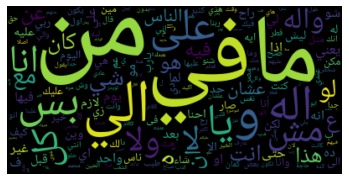

In [ ]:
text=df['text']

text = ' '.join([str(elem) for elem in text])
from collections import Counter

from wordcloud import WordCloud          # pip install wordcloud
import matplotlib.pyplot as plt          
# -- Arabic text dependencies
from arabic_reshaper import reshape      # pip install arabic-reshaper
from bidi.algorithm import get_display   # pip install python-bidi

rtl = lambda w: get_display(reshape(f'{w}'))

COUNTS = Counter(text.split())
counts = {rtl(k):v for k, v in COUNTS.most_common(500)}

font_file = '/content/NotoNaskhArabic-Regular.ttf' # download from: https://www.google.com/get/noto
wordcloud = WordCloud(font_path=font_file).generate_from_frequencies(counts)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Create a WordCloud 
import arabic_reshaper
# Politic_df = df[(df['categorie']=='السياسة')]

# long_string = ','.join(list(Politic_df.text.values))

# reshaped_text = arabic_reshaper.reshape(long_string)
# bidi_text = get_display(reshaped_text)
# wordcloud = WordCloud(stopwords=arab_stopwords,max_words=100,width=1000, height=700,background_color="black",font_path='NotoNaskhArabic-Regular.ttf').generate(bidi_text)
# plt.imshow(wordcloud, interpolation= None)
# plt.axis("off")
# plt.show()

# Count Vectorizer


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(df['text'])

# Long Short Term Memory (LSTM)
# Data Preparation and Pad text Data

In [ ]:
from sklearn import preprocessing

In [ ]:
pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(df['dialect'])
df['dialect'] = encpro

In [ ]:
X=df['text'].values
y=df['dialect'].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print('Training Data:', X_train.shape[0])
print('Test Data:', X_test.shape[0])

Training Data: 366557
Test Data: 91640


In [ ]:
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import text,sequence
max_features=10000
#which is set to 10000. This is because when you convert words to numbers using the bag of words approach, 
#all the unique words in all the documents are converted into features. 
#All the documents can contain tens of thousands of unique words.
#But the words that have a very low frequency of occurrence are unusually not a good parameter for classifying documents. 
#Therefore we set the max_features parameter to 10000, which means that we want to use 10000 most occurring words as features for training our classifier.
max_text_length=20


x_tokenizer=Tokenizer(max_features)

In [ ]:
x_tokenizer.fit_on_texts(X)
word_index = x_tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 429127 unique tokens.


In [ ]:
import collections
print('Top 5 most common words are:', collections.Counter(x_tokenizer.word_counts).most_common(5))

Top 5 most common words are: [('من', 100077), ('ما', 75004), ('في', 72948), ('الي', 71975), ('و', 64455)]


In [ ]:
#text to numbers
#return each text by sequence of integers ,each integer be the index of token in dictionary
x_train=x_tokenizer.texts_to_sequences(X_train) 
x_train_val=sequence.pad_sequences(x_train,padding='post',maxlen=max_text_length)
x_test=x_tokenizer.texts_to_sequences(X_test) 
x_test_val=sequence.pad_sequences(x_test,padding='post',maxlen=max_text_length)

In [ ]:
X_train[6]

'اقسم باله المصرين سكتوكي'

In [ ]:
x_train_val[32]

array([3037,   13, 1025,   53,  123, 6115,  843,   26, 2010,  265,  629,
          0,    0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, LSTM,Embedding
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D ,Dropout
maxlen=max_text_length
embedding_dim=100
model=Sequential()
model.add(layers.Embedding(input_dim=max_features,
         output_dim=embedding_dim,
         input_length=maxlen))

model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128, return_sequences = True))
model.add(layers.LSTM(128))

model.add(layers.Dropout(0.8))


model.add(layers.Dense(18, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 20, 100)           1000000   
                                                                 
 lstm (LSTM)                 (None, 20, 128)           117248    
                                                                 
 lstm_1 (LSTM)               (None, 20, 128)           131584    
                                                                 
 lstm_2 (LSTM)               (None, 20, 128)           131584    
                                                                 
 lstm_3 (LSTM)               (None, 20, 128)           131584    
                                                                 
 lstm_4 (LSTM)               (None, 20, 128)           131584    
                                                                 
 lstm_5 (LSTM)               (None, 20, 128)           1

In [ ]:
history=model.fit(x_train_val,y_train, epochs=10, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/10
9164/9164 [==============================] - 2390s 259ms/step - loss: 2.2486 - accuracy: 0.2813 - val_loss: 1.9994 - val_accuracy: 0.3471
Epoch 2/10
9164/9164 [==============================] - 2502s 273ms/step - loss: 1.9526 - accuracy: 0.3780 - val_loss: 1.8662 - val_accuracy: 0.4021
Epoch 3/10
9164/9164 [==============================] - 2269s 248ms/step - loss: 1.8360 - accuracy: 0.4225 - val_loss: 1.8332 - val_accuracy: 0.4170
Epoch 4/10
9164/9164 [==============================] - 2246s 245ms/step - loss: 1.7567 - accuracy: 0.4516 - val_loss: 1.8016 - val_accuracy: 0.4330
Epoch 5/10
9164/9164 [==============================] - 2213s 241ms/step - loss: 1.6849 - accuracy: 0.4782 - val_loss: 1.8170 - val_accuracy: 0.4368
Epoch 6/10
9164/9164 [==============================] - 2209s 241ms/step - loss: 1.6206 - accuracy: 0.5018 - val_loss: 1.8035 - val_accuracy: 0.4428
Epoch 7/10
9164/9164 [==============================] - 2232s 244ms/step - loss: 1.5585 - accuracy: 0.5208

In [ ]:
scores,accuracy = model.evaluate(x_test_val, y_test)
print('Score:',scores)
print('Accuracy:',accuracy)

2864/2864 [==============================] - 197s 67ms/step - loss: 1.9877 - accuracy: 0.4414
Score: 1.9876868724822998
Accuracy: 0.4413793087005615


In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()